#🧠 Machine Learning: Algoritma K-Means dengan Python
##📌 Studi Kasus
Seorang Data Scientist bernama Sunyi dari perusahaan teknologi XYZ menerima tugas dari manajer CRM pusat perbelanjaan ABC untuk menganalisis data riwayat konsumen. Tujuan dari analisis ini adalah untuk memahami karakteristik pelanggan dan merancang sistem pengelolaan konsumen yang lebih efektif.

Sunyi menggunakan bahasa pemrograman Python dan algoritma K-Means Clustering untuk mengelompokkan pelanggan berdasarkan perilaku mereka. Dengan pendekatan ini, perusahaan dapat mengenali segmen pelanggan secara lebih mendalam dan menyusun strategi pemasaran yang lebih tepat sasaran.

##🔄 Tahapan Pengerjaan
1. Persiapan Dataset
- Dataset yang digunakan berisi informasi berikut:

- customer_id: ID unik pelanggan

- frequency: Frekuensi kunjungan atau pembelian

- recency: Jarak waktu sejak transaksi terakhir

- monetary: Total nilai pembelian

In [2]:
#Import library pandas
import pandas as pd

#Membaca data
data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/RFM_customer.csv", encoding='utf8')

#Menampilkan 10 baris teratas
print(data.head(10))

   customer_id  frequency  recency     monetary
0        12346          1       48  27904840000
1        12347          2       40    423420000
2        12348          2       41    414092000
3        12350          1       33    119478000
4        12352          3        6    449984000
5        12356          1       48    809968000
6        12359          2       28    842749000
7        12361          1       10     67602000
8        12362          1       18    170512000
9        12365          2       14    226652000


## 2. Melihat Tipe Data dari Setiap Kolom
Setelah dataset berhasil dimuat, langkah selanjutnya adalah memahami struktur data yang tersedia. Ini dilakukan dengan melihat dimensi dataset dan tipe data dari setiap kolom.

In [3]:
#Melihat dimensi dataframe
print(data.shape)

(1625, 4)


In [4]:
# melihat tipe data dari setiap kolom
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625 entries, 0 to 1624
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   customer_id  1625 non-null   int64
 1   frequency    1625 non-null   int64
 2   recency      1625 non-null   int64
 3   monetary     1625 non-null   int64
dtypes: int64(4)
memory usage: 50.9 KB


- Semua kolom bertipe integer (int64), yang cocok untuk analisis numerik dan clustering.

- Tidak terdapat nilai kosong (null) pada keempat kolom, sehingga data siap untuk tahap preprocessing selanjutnya.

3. Melihat Statistik dari Setiap Kolom

Setelah memahami tipe data, langkah selanjutnya adalah melihat statistik deskriptif dari setiap kolom untuk mendapatkan gambaran umum distribusi data.

In [5]:
#Untuk melihat statistik dari setiap kolom
print(data.describe())

        customer_id    frequency      recency      monetary
count   1625.000000  1625.000000  1625.000000  1.625000e+03
mean   15261.415385     1.910769    36.455385  3.321584e+08
std     1745.556403     2.111145    26.934570  1.140958e+09
min    12346.000000     1.000000     1.000000  3.100000e+05
25%    13764.000000     1.000000    13.000000  7.520200e+07
50%    15221.000000     1.000000    32.000000  1.380670e+08
75%    16805.000000     2.000000    54.000000  2.902490e+08
max    18283.000000    34.000000    90.000000  2.790484e+10


4. Mengecek Missing Value dan Menghapus Kolom

Sebelum melanjutkan ke proses clustering, penting untuk memastikan bahwa data bersih dari nilai kosong (missing value) dan hanya berisi fitur yang relevan.

In [6]:
#Mengecek apakah ada data null
print(data.isnull().any().any())

False


In [7]:
#Menghapus kolom customer_id
RFM_km = data.drop(["customer_id"], axis=1)
print(RFM_km.head())

   frequency  recency     monetary
0          1       48  27904840000
1          2       40    423420000
2          2       41    414092000
3          1       33    119478000
4          3        6    449984000


5. Melakukan Standarisasi Data

In [8]:
#Import StandardScaler
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
RFM_standardized = standard_scaler.fit_transform(RFM_km)
RFM_standardized = pd.DataFrame(RFM_standardized)
RFM_standardized.columns = ["Frequency","Monetary","Recency"]
print(RFM_standardized.head())

   Frequency  Monetary    Recency
0  -0.431543  0.428749  24.173698
1   0.042280  0.131641   0.080011
2   0.042280  0.168780   0.071833
3  -0.431543 -0.128328  -0.186463
4   0.516102 -1.131065   0.103301


6. Implementasi K-Means Clustering

In [9]:
# Import KMeans untuk mengimplementasikan K-Means Clustering
from sklearn.cluster import KMeans

# Mengatur parameter k-means, jumlah cluster yang akan dibentuk adalah 3
k_means = KMeans(n_clusters=3, random_state=0)
k_means.fit(RFM_standardized)

# Pred menyimpan hasil prediksi label cluster untuk setiap data
pred = k_means.predict(RFM_standardized)


In [10]:
# Menggabungkan RFM dan hasil label clustering
RFM_labeled = pd.concat([RFM_standardized,
                         pd.Series(pred).rename('cluster')], axis=1)
print(RFM_labeled.head())


   Frequency  Monetary    Recency  cluster
0  -0.431543  0.428749  24.173698        2
1   0.042280  0.131641   0.080011        1
2   0.042280  0.168780   0.071833        1
3  -0.431543 -0.128328  -0.186463        1
4   0.516102 -1.131065   0.103301        1


In [11]:
# Menghitung jumlah data di setiap cluster
RFM_labeled['cluster'].value_counts()
print(RFM_labeled['cluster'].value_counts())


cluster
1    1087
0     514
2      24
Name: count, dtype: int64


Dari hasil di atas, aku dapat melihat bahwa terdapat 1089 data yang tergabung dalam cluster 0, 514 data tergabung dalam cluster 2, dan 22 data tergabung dalam cluster 1.

7. Menampilkan Box Plot

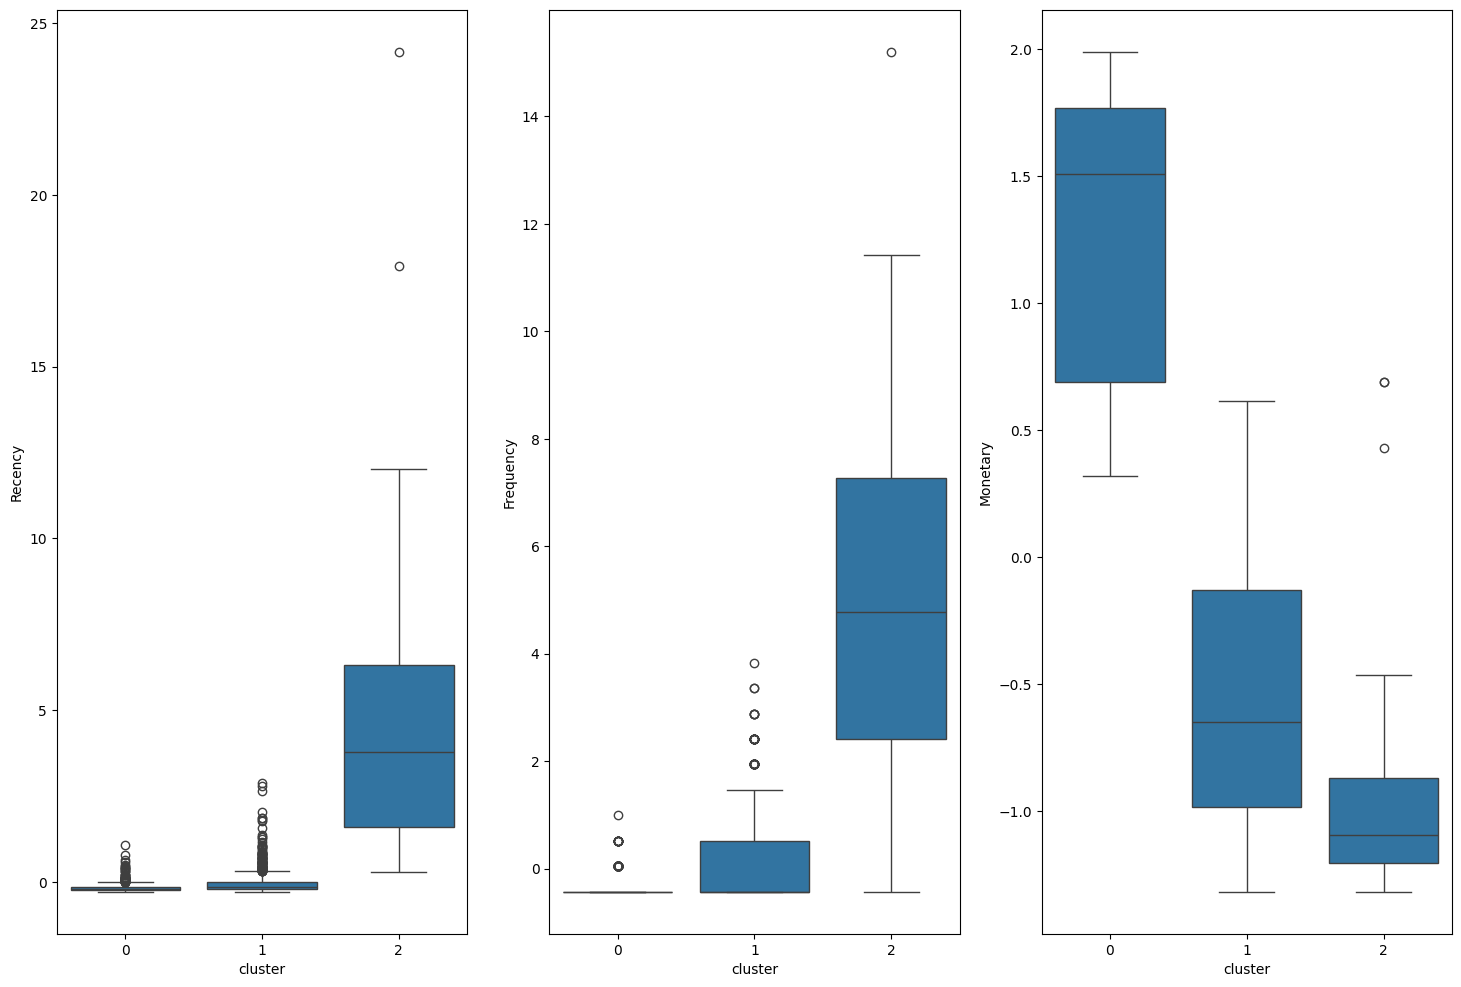

In [12]:
#Import library matplotlib & seaborn
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1,3, figsize=(18,12))

#Menampilkan hasil clustering untuk setiap data dalam bentuk boxplot
sns.boxplot(x="cluster", y="Recency", data=RFM_labeled, ax=ax[0])
sns.boxplot(x="cluster", y="Frequency", data=RFM_labeled, ax=ax[1])
sns.boxplot(x="cluster", y="Monetary", data=RFM_labeled, ax=ax[2])
plt.show()


8. Ringkasan Analisis K-Means Clustering

Cluster 0 (1.089 konsumen) Konsumen yang sering datang dan baru-baru ini bertransaksi.

- Frekuensi kunjungan tinggi

- Total transaksi lebih banyak dibanding cluster 1

- Perlu perhatian karena jumlahnya paling banyak

Cluster 1 (22 konsumen) Konsumen yang sudah lama tidak bertransaksi, tapi frekuensi kunjungannya paling tinggi.

- Recency tinggi (lama sejak transaksi terakhir)

- Total transaksi paling kecil

- Jumlah konsumen paling sedikit

- Bisa jadi loyal tapi tidak belanja banyak

Cluster 2 (514 konsumen) Konsumen yang baru-baru ini bertransaksi, tapi frekuensi kunjungannya rendah.

- Total transaksi jauh lebih banyak dibanding cluster lainnya

- Perlu dijaga relasi, misalnya dengan promosi khusus

Insight Bisnis untuk Aksara
- Fokus pada Cluster 2 untuk menjaga relasi dan meningkatkan frekuensi kunjungan

- Perhatikan Cluster 0 karena jumlahnya besar, meskipun frekuensinya tidak setinggi Cluster 1

- Evaluasi strategi untuk Cluster 1, karena meskipun sering datang, mereka tidak banyak bertransaksi